# Classification project on star Dataset

In [1]:
# Import Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [2]:
# Import data
df=pd.read_csv(r"/content/Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visuallization

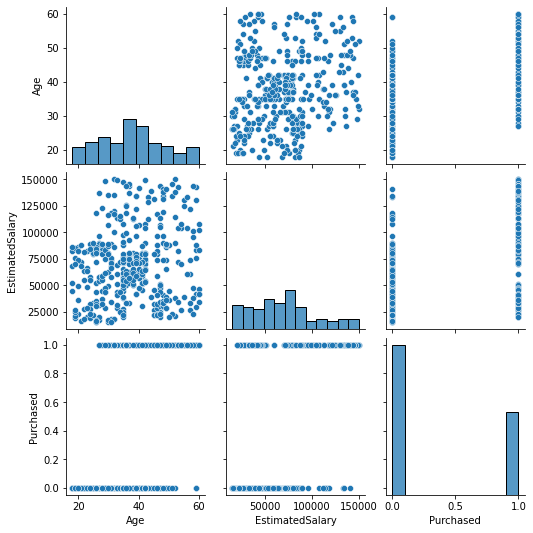

In [6]:
sns.pairplot(data=df)

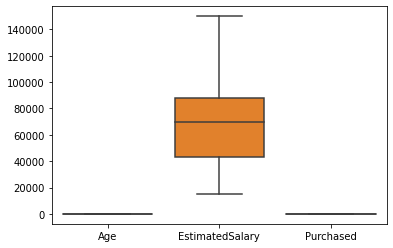

In [7]:
sns.boxplot(data=df)

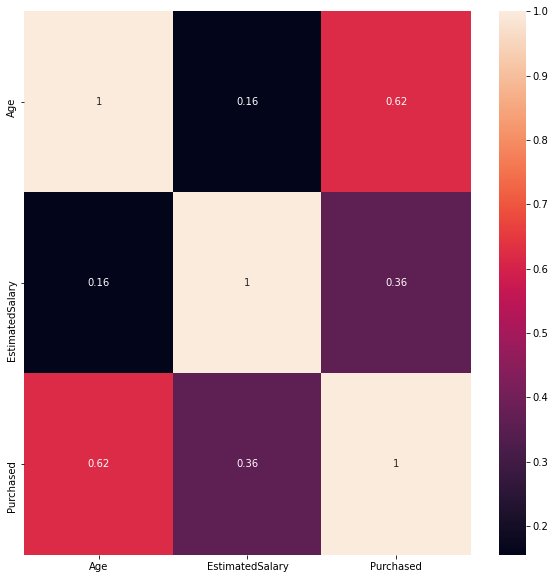

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

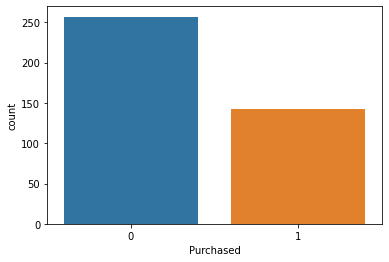

In [11]:
sns.countplot(data=df,x='Purchased')

In [27]:
#% of 1 in target variable
print(f"% of 1 in target variable is {(150/250)*100} %")
print(f"% of 0 in target variable is {(100/250.*100)} %")

% of 1 in target variable is 60.0 %
% of 0 in target variable is 40.0 %


In [28]:
#Here target variable percentage is 60% for 0 and 40% for 1 which is within allowable limits.
# It should be less then 70%,30%.
#So, our output is not biased.

AxesSubplot(0.125,0.125;0.775x0.755)


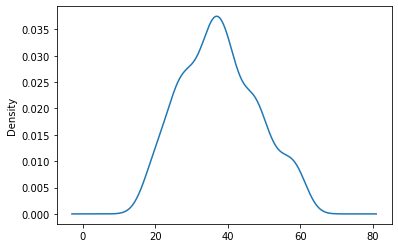

In [13]:
print(df["Age"].plot.kde())

AxesSubplot(0.125,0.125;0.775x0.755)


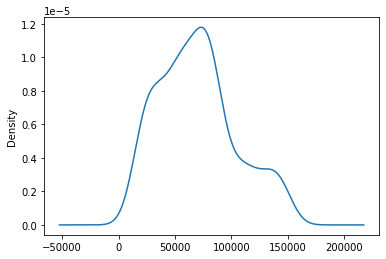

In [14]:
print(df["EstimatedSalary"].plot.kde())

In [15]:
x=df.drop(["Purchased"],axis=1)
y=df["Purchased"]

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
#Prepare multiple models
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC()
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "BaggingClassifier":BaggingClassifier(),"XGBClassifier":XGBClassifier()}

In [20]:
#Function for training the multiple models and generating accuracy¶
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


In [21]:
acc=modelAccuracy(models,x,y,0)

The Accuracy for  LogisticRegression  is : 0.725
The Accuracy for  DecisionTreeClassifier  is : 0.9125
The Accuracy for  SVM  is : 0.825
The Accuracy for  KNN  is : 0.825
The Accuracy for  GNB  is : 0.925
The Accuracy for  RandomForestClassifier  is : 0.9375
The Accuracy for  AdaBoostClassifier  is : 0.925
The Accuracy for  GradientBoostingClassifier  is : 0.925
The Accuracy for  BaggingClassifier  is : 0.9375
The Accuracy for  XGBClassifier  is : 0.95


In [22]:
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)

In [23]:
acc

{'AdaBoostClassifier': 0.925,
 'BaggingClassifier': 0.9375,
 'DecisionTreeClassifier': 0.9125,
 'GNB': 0.925,
 'GradientBoostingClassifier': 0.925,
 'KNN': 0.825,
 'LogisticRegression': 0.725,
 'RandomForestClassifier': 0.9375,
 'SVM': 0.825,
 'XGBClassifier': 0.95}

In [24]:
bestModel(acc)

Best model is  XGBClassifier  with Accuracy  0.95


In [29]:
def bestParameter(model,params,x,y):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring="accuracy")
    res=grid_cv.fit(x,y)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)
    

In [30]:
model=KNeighborsClassifier()
params={"n_neighbors":[3,4,5],"weights":['uniform','distance']}
bestParameter(model,params,xtrain,ytrain)

Best Parameters are  {'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy is  0.9020833333333333


In [31]:
#Retraining The model using best parameters
model=XGBClassifier(n_neighbors=3,weights='uniform')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



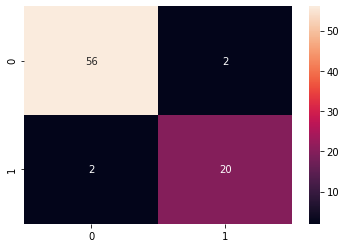

In [32]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [33]:
#voting classifier
models=[('lr',LogisticRegression(class_weight='balanced')),('knn',KNeighborsClassifier(n_neighbors=3)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting='hard')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.925
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.86      0.86      0.86        22

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



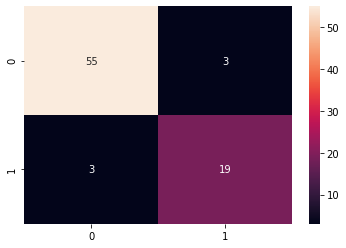

In [34]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [35]:
# Stacked classifier
base_models=[('knn',KNeighborsClassifier(n_neighbors=5)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB())
             ,('rf',RandomForestClassifier(n_estimators=100))]
final_model=LogisticRegression()

from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9625
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.91      0.95      0.93        22

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.96      0.96        80



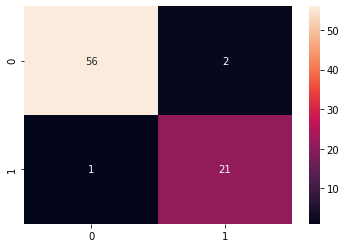

In [36]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

# conclusion:
            Best Model is StackingClassifierr with Accuracy 96.25%